### Check how generated sequence compares to thermo and to meso

In [41]:
import pandas as pd
import json
import seaborn as sns
sns.set_style('ticks')
sns.set_context('talk')

In [2]:
with open('../data/nomelt-model/test_predictions_aligned_results.json', 'r') as f:
    raw_data = json.load(f)

In [3]:
raw_data

[{'tg': {'seq1': 'MSTK---E-K--IF-E-AAVEVFSEKGFAK-AT-ME-EIARRA-----GIAKGTLYYN-Y-RSKKELFLS-LIEEGIERL--EA----AVKR---E--IARRR--DTSS-KLE--ALIG-AQLSFFEEY-R---D-------YCKLLLS--EVWGLGSRW-EKQ-----LE-RLRSG-YIGI--I-KDLLQR-GQA-E-GIIRQ-DLEVNTAA---MGVFGAVA-V-AALNAFLFERQYH-Y--ESL--L---QTL--KNLLF---L--GLNER----EG----',
   'seq2': 'M---PYGERKTQI-IETAA-QLFSERGY--HATSV-RDIA--AALDLQG---GSL-Y-AHIQSKEEV-L-WLI---VER-AAE-QFFEAV-RPLAESDL----PPD---EKL-RRA-V-HA-------HIRVITDDLAAATVY------FHE-W----RFLEEEHRNTFLEQR-R--EY---EHLWREMV-REG--MEKGVLR-ND-E-D---PKYM----AI-LILSAMN-WL----YHWYRPD--GPLSPDE-IAER---FWRMLLEGL-Q-APVFE-VPTA',
   'score': 427.0,
   'begin': 0,
   'end': 284,
   'identity': 0.25,
   'bpr': 1.5035211267605635},
  'mt': {'seq1': 'MDE-W-ESR---VA-E-AALQIL-AEQGLA--AVT-V---ASLARRL--KA--SRMTL--HRNGI-TRERVIE-L-LSL--RAADEYQR---AVW-PTLVSAG-TGLDRL--D-RVLR---HTC---RVA--D--A--------WRFLLVGLFAEDGGIF-HEPV-DATG--EERSRAVATRSV-FVDP-LA-R-LLRDG-ELD-GTLV-QF-DDFD-QT--ATVLF-----NQ-VG--WTYLALRV--G-----Q---R-WSHESA----E--EA-

In [4]:
melted = []
for r in raw_data:
    tg = r['tg']
    tg['from'] = 'tg'

    mt = r['mt']
    mt['from'] = 'mt'

    mg = r['mg']
    mg['from'] = 'mg'

    melted.extend([tg, mt, mg])
df = pd.DataFrame(melted)

In [5]:
df

,seq1,seq2,score,begin,end,identity,bpr,from
0,MSTK---E-K--IF-E-AAVEVFSEKGFAK-AT-ME-EIARRA---...,M---PYGERKTQI-IETAA-QLFSERGY--HATSV-RDIA--AALD...,427.0,0,284,0.250000,1.503521,tg
1,MDE-W-ESR---VA-E-AALQIL-AEQGLA--AVT-V---ASLARR...,M--PYGE-RKTQI-IETAA-Q-LFSERG--YHA-TSVRDIAA-A--...,444.0,0,295,0.264407,1.505085,mt
2,MD--EWESRVA-EAALQIL-AEQGL-A-AVTVAS--LARR--LKAS...,M-STK-E-KI-FEAAVEV-FSEKG-FAKA-TM--EEIARRAGI-A-...,414.0,0,284,0.250000,1.457746,mg
3,MS--TR---E-----RILD-AAER-VFAE-KGFAK-AT-MEEIA-R...,MSAKT-DSLEQPAKTRIL-KAAE-EVFA-AKGFA-GA-RVDEIATR...,477.0,0,294,0.295918,1.622449,tg
4,MI----D--EEPQMETLLQGA-TR-L------FAAL-GY-----D-...,M-SAKTDSLEQP--------AKTRILKAAEEVFAA-KGFAGARVDE...,496.0,0,313,0.274760,1.584665,mt
...,...,...,...,...,...,...,...,...
1291,M----RLTLKIWR-QA---DAASEGAMHT-Y-EID-DVSE-D--M-...,MADKIR--LRI-RRQASPQD--S------PYWE-EFEV-EYEPNMN...,625.0,0,360,0.275000,1.736111,mt
1292,MRLTLKIWRQADAASE-GA-MH-TYEIDDVS-EDM-SFLEMLDVLN...,MRLTLKVWRQADASS-PG-RL-ETYEV-DV-PED-ASFLEMLDLLN...,1001.0,0,293,0.600683,3.416382,mg
1293,MKIY-IGADHG-GFE-LKE--KLK--EFLKEKGYEVE--DL-GNTV...,MKI-AIGSDH-AGF-SLKEAVK-KHLE--K-KG--VEFKD-FG-T-...,461.0,0,193,0.424870,2.388601,tg
1294,MRVY-LGADHAGFER--KNEI-IE-HL-KAA-GH-ETV--DC-GAH...,MKI-AIGSDHAGF--SLK-E-AVKKHLEK--KG-VE--FKD-FG--...,423.0,0,209,0.363636,2.023923,mt


In [7]:
df.groupby('from').describe()['bpr']

,count,mean,std,min,25%,50%,75%,max
from,,,,,,,,
mg,432.0,2.259149,0.839368,0.306167,1.704084,2.200102,2.671642,5.000000
mt,432.0,2.035166,0.478962,1.427350,1.695771,1.893990,2.237978,3.787879
tg,432.0,2.212840,0.786361,0.228330,1.786983,2.099073,2.521671,5.210938


In [8]:
df.groupby('from').describe()['identity']

,count,mean,std,min,25%,50%,75%,max
from,,,,,,,,
mg,432.0,0.398461,0.158793,0.055072,0.290005,0.381491,0.467701,1.000000
mt,432.0,0.351522,0.087182,0.236915,0.288890,0.323987,0.389846,0.727273
tg,432.0,0.390469,0.153594,0.040169,0.307502,0.372253,0.444558,1.000000


/tmp/ipykernel_24117/1921940988.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('from').mean()['identity'].plot.box()


<AxesSubplot: >

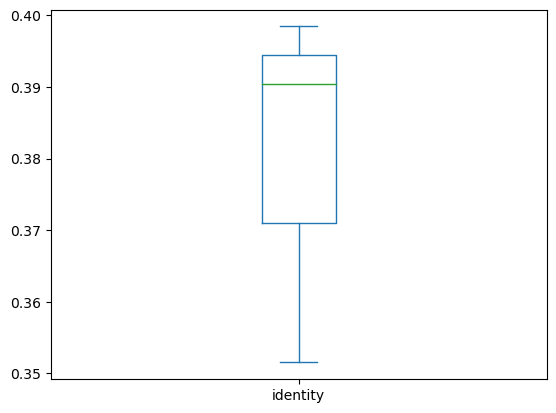

In [39]:
df.groupby('from').mean()['identity'].plot.box()

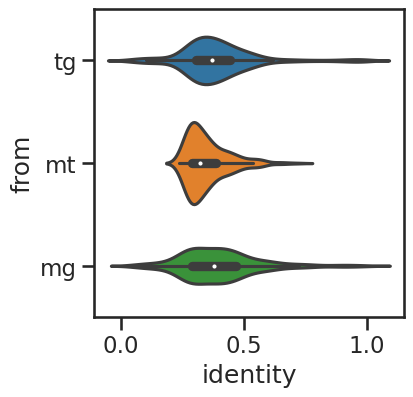

In [44]:
fig, ax = plt.subplots(figsize=(4,4))
ax.set_ylabel('sequence pair')

sns.violinplot(data=df, x='identity', y='from')
plt.savefig('../data/plots/generated_alignment_score_violin_to_thermo_or_meso.png', dpi=400, bbox_inches='tight')

In [47]:
for r in raw_data:
    r['gt_ratio'] = r['tg']['identity'] / r['mt']['identity']
    r['gm_ratio'] = r['mg']['identity'] / r['mt']['identity']

In [62]:
gt_ratio = [r['gt_ratio'] for r in raw_data]
gm_ratio = [r['gm_ratio'] for r in raw_data]
df = pd.DataFrame({'Generated-thermo': gt_ratio, 'Generated-meso': gm_ratio})

In [63]:
df.describe()

,Generated-thermo,Generated-meso
count,432.000000,432.000000
mean,1.133701,1.139194
std,0.459316,0.391508
min,0.147967,0.163950
25%,0.951084,0.944055
50%,1.080270,1.088368
75%,1.207550,1.315651
max,3.371901,3.279040


In [64]:
df = pd.melt(df, value_vars=['Generated-thermo', 'Generated-meso'])

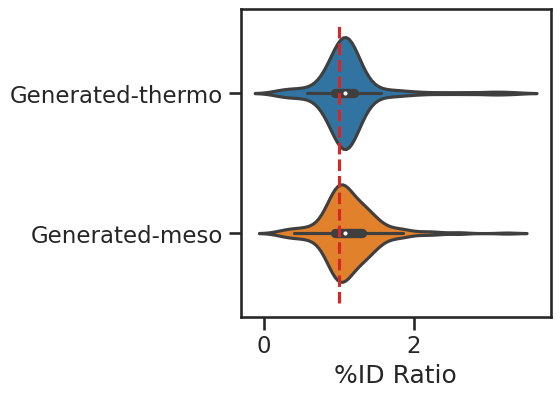

In [73]:

fig, ax = plt.subplots(figsize=(4,4))
sns.violinplot(data=df, x='value', y='variable', ax=ax)
ax.vlines(x=1.0, ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='tab:red', ls='--')
ax.set_ylabel('')
ax.set_xlabel('%ID Ratio')
plt.savefig('../data/plots/generated_alignment_score_violin_to_thermo_or_meso_ratio.png', dpi=400, bbox_inches='tight')

### Make triangle plot

0.735593220438983 0.9000000002
1.4016184804325733
0.7252396167134185 0.8540816328530613
1.3582164430575427
0.6363636364636364 0.6369565219391304
nan
0.7364016737401673 0.8300000002
1.365525768701103
0.7045454546454546 0.8602803740317758
1.3823532359690147
0.5811965812965811 0.7098290600290599
1.3075608111726007
0.631578947468421 0.7260000002000001
1.3186234078944439
0.6570512821512821 0.773728813759322
1.3280065235698788
0.6608391609391608 0.8250902529075813
1.3871762393631937
0.5175438597491229 0.7624031009751938
nan
0.728813559422034 0.568918919118919
nan
0.6651785715285714 0.8090909092909092
1.3562465362845197


/tmp/ipykernel_24117/436930209.py:10: RuntimeWarning: invalid value encountered in sqrt
  y =np.sqrt(mg**2 - x**2)


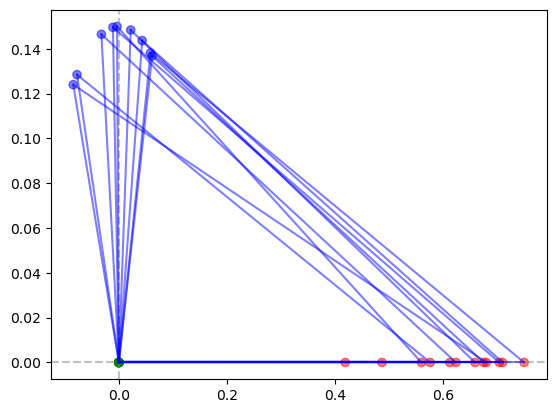

In [38]:
import matplotlib.pyplot as plt
import numpy as np

def compute_distance(identity):
    return 1.0 - identity

def get_initial_meso(mg, mt, tg):
    x = (-mt**2 + tg**2 + mg**2)/tg
    # print(x, mg)
    y =np.sqrt(mg**2 - x**2)
    return (x,y)

def rotate_point(point, angle):
    x, y = point
    x_new = x * np.cos(angle) - y * np.sin(angle)
    y_new = x * np.sin(angle) + y * np.cos(angle)
    return (x_new, y_new)

def plot_triangle(r, ax):
    try:
        identity_tg = r['tg']['identity']
        identity_mt = r['mt']['identity']
        identity_mg = r['mg']['identity']
    
        
        dist_tg = compute_distance(identity_tg) + 1e-10
        dist_mt = compute_distance(identity_mt) + 1e-10
        dist_mg = compute_distance(identity_tm) + 1e-10
        print(dist_mt, dist_mg + dist_tg)
        # place gen at orgin, thermo on the x axis, then find meso position using distances
        G = (0.0, 0.0)
        T = (dist_tg, 0.0)
        M = get_initial_meso(dist_mg, dist_mt, dist_tg)
        
        # Compute centroid
        centroid_x = (T[0] + M[0]) / 3
        centroid_y = (M[1]) / 3

        # angle for x axis
        angle_with_x = np.arctan2(centroid_y, centroid_x)
        # get y axis
        theta = np.pi/2 - angle_with_x
        print(theta)
        
        # Rotate thermo and meso around gen
        thermo_rotated = T # rotate_point(T, theta)
        meso_rotated = M #rotate_point(M, theta)
    except:
        print(r)
        raise
    
    # Plotting
    ax.plot([G[0], thermo_rotated[0]], [G[1], thermo_rotated[1]], 'b-', alpha=0.5)
    ax.plot([G[0], meso_rotated[0]], [G[1], meso_rotated[1]], 'b-', alpha=0.5)
    ax.plot([thermo_rotated[0], meso_rotated[0]], [thermo_rotated[1], meso_rotated[1]], 'b-', alpha=0.5)
    
    ax.scatter([G[0], thermo_rotated[0], meso_rotated[0]], [G[1], thermo_rotated[1], meso_rotated[1]], c=['green', 'red', 'blue'], alpha=0.5)

fig, ax = plt.subplots()
ax.axhline(0, color='grey', linestyle='--', alpha=0.5)
ax.axvline(0, color='grey', linestyle='--', alpha=0.5)

def do_one(r):
    plot_triangle(r, ax)

for i, r in enumerate(raw_data):
    do_one(r)
    if i > 10:
        break

plt.show()
